In [1]:
import pandas as pd
df = pd.read_csv("mirror_publications_etherscan.csv")
df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,week_google_searches_nft,week_google_searches_crypto,week_google_searches_bitcoin,week_google_searches_ethereum,week_google_searches_optimism,Success,SuccessBinary,author_address,author_ether_balance,author_transactions_number
0,https://opensea.io/assets/optimism/0x26bbb507d...,https://mirror.xyz/0xf4cdb62c9a66c749cdf736c43...,0.5900,59,53,0.0100,0x26bbb507daa7c0dec6a578a09f0d7ac85ff6fec5,man1f3st0,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,59000.0,1,0xf4cdb62c9a66c749cdf736c43e96ff11d2bab444,0.014894,10.0
1,https://opensea.io/assets/optimism/0x3e21e1d8e...,https://mirror.xyz/0x4ced9817cad891aeffbf5fb7d...,2.0000,200,198,0.0100,0x3e21e1d8e89d675aca9708aee0ae05c7f6622c29,canto-genesis,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,200000.0,1,0x4ced9817cad891aeffbf5fb7dcb6f3c6aebd4228,0.016364,2.0
2,https://opensea.io/assets/optimism/0xdd81b24ec...,https://mirror.xyz/0xb8dbf8e09c1cb83da9632e137...,0.0001,1,1,0.0001,0xdd81b24ec7813d0fc8570bfd5008271037122349,niswap-airdrop-iron,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,10.0,0,0xb8dbf8e09c1cb83da9632e137559a4471646d633,0.000000,0.0
3,https://opensea.io/assets/optimism/0xd283a8373...,https://mirror.xyz/0xc065e02d562cc390f35693059...,0.0000,53,53,0.0001,0xd283a8373ada1285547bba0d36556ea47ac25c54,trading-on-kwenta-mobile,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,530.0,1,0xc065e02d562cc390f3569305990bfd13b17eec6b,0.000098,10.0
4,https://opensea.io/assets/optimism/0x3fada15d6...,https://mirror.xyz/0x0df68ee531dab63d651132c7f...,0.0000,2,2,0.0001,0x3fada15d698a86a23e871d9b1bea9877e38e1e6b,some-words-about-rabbithole,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,20.0,0,0x0df68ee531dab63d651132c7f56c6cdfe2689d19,0.010063,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26870,https://opensea.io/assets/optimism/0x81457615f...,https://mirror.xyz/0xd5f09257a7b7d070c39e6b473...,0.0000,2,2,0.0001,0x81457615fcd852e1d51ec8273d0ef6e95e4a7da6,unlock-the-full-potential-of-safe-wallet-sign-...,[2.5],2024-11-18,...,26,100,84,53,43,20.0,0,0xd5f09257a7b7d070c39e6b4737933324456b6211,0.092097,10.0
26871,https://opensea.io/assets/optimism/0xd84035bc2...,https://mirror.xyz/0x489e3e846bb550cb7b023108c...,0.0000,5,5,0.0001,0xd84035bc253d7ab99d3e05c1d1f6d1185300a602,the-governance-staking-era,[2.5],2024-11-18,...,26,100,84,53,43,50.0,1,0x489e3e846bb550cb7b023108ce071bb39fd23cd8,0.012132,10.0
26872,https://opensea.io/assets/optimism/0x3403ab72d...,https://mirror.xyz/0x5ee94b80d60880f25048b6158...,0.0000,1,1,0.0001,0x3403ab72df88717d4b9067fc08daf07949bab830,superchain-sunday-week-46-2024,[2.5],2024-11-18,...,26,100,84,53,43,10.0,0,0x5ee94b80d60880f25048b61588d8cb23c79aa3ae,0.014976,10.0
26873,https://opensea.io/assets/optimism/0x9fff9c16f...,https://mirror.xyz/0x9ad0cb287b57828a2fb2b738d...,0.0000,4,4,0.0001,0x9fff9c16fde288329a2b663697ef2d04e967b4a9,the-morpho-dao-to-enable-transferability-for-m...,[2.5],2024-11-18,...,26,100,84,53,43,40.0,1,0x9ad0cb287b57828a2fb2b738da2e2f4727eaed28,0.000000,0.0


In [2]:
# Calcoliamo i terzili per dividere i dati in 3 classi bilanciate
terzili = df["Success"].quantile([1/3, 2/3]).values

# Creiamo la colonna "SuccessClass3" in base ai terzili
df["SuccessClass3"] = pd.cut(df["Success"], bins=[-float("inf"), terzili[0], terzili[1], float("inf")], labels=[0, 1, 2])

# Calcoliamo i quartili per dividere i dati in 4 classi bilanciate
quartili = df["Success"].quantile([1/4, 2/4, 3/4]).values

# Creiamo la colonna "SuccessClass4" in base ai quartili
df["SuccessClass4"] = pd.cut(df["Success"], bins=[-float("inf"), quartili[0], quartili[1], quartili[2], float("inf")], labels=[0, 1, 2, 3])

# Verifica delle distribuzioni
class_counts_3 = df["SuccessClass3"].value_counts()
class_counts_4 = df["SuccessClass4"].value_counts()

class_counts_3, class_counts_4

(SuccessClass3
 0    11745
 2     8736
 1     6394
 Name: count, dtype: int64,
 SuccessClass4
 0    8624
 3    6688
 2    5881
 1    5682
 Name: count, dtype: int64)

In [3]:
df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,week_google_searches_bitcoin,week_google_searches_ethereum,week_google_searches_optimism,Success,SuccessBinary,author_address,author_ether_balance,author_transactions_number,SuccessClass3,SuccessClass4
0,https://opensea.io/assets/optimism/0x26bbb507d...,https://mirror.xyz/0xf4cdb62c9a66c749cdf736c43...,0.5900,59,53,0.0100,0x26bbb507daa7c0dec6a578a09f0d7ac85ff6fec5,man1f3st0,"[2.5, 10.0]",2022-08-16,...,36,56,35,59000.0,1,0xf4cdb62c9a66c749cdf736c43e96ff11d2bab444,0.014894,10.0,2,3
1,https://opensea.io/assets/optimism/0x3e21e1d8e...,https://mirror.xyz/0x4ced9817cad891aeffbf5fb7d...,2.0000,200,198,0.0100,0x3e21e1d8e89d675aca9708aee0ae05c7f6622c29,canto-genesis,"[2.5, 10.0]",2022-08-16,...,36,56,35,200000.0,1,0x4ced9817cad891aeffbf5fb7dcb6f3c6aebd4228,0.016364,2.0,2,3
2,https://opensea.io/assets/optimism/0xdd81b24ec...,https://mirror.xyz/0xb8dbf8e09c1cb83da9632e137...,0.0001,1,1,0.0001,0xdd81b24ec7813d0fc8570bfd5008271037122349,niswap-airdrop-iron,"[2.5, 10.0]",2022-08-16,...,36,56,35,10.0,0,0xb8dbf8e09c1cb83da9632e137559a4471646d633,0.000000,0.0,0,0
3,https://opensea.io/assets/optimism/0xd283a8373...,https://mirror.xyz/0xc065e02d562cc390f35693059...,0.0000,53,53,0.0001,0xd283a8373ada1285547bba0d36556ea47ac25c54,trading-on-kwenta-mobile,"[2.5, 10.0]",2022-08-16,...,36,56,35,530.0,1,0xc065e02d562cc390f3569305990bfd13b17eec6b,0.000098,10.0,2,3
4,https://opensea.io/assets/optimism/0x3fada15d6...,https://mirror.xyz/0x0df68ee531dab63d651132c7f...,0.0000,2,2,0.0001,0x3fada15d698a86a23e871d9b1bea9877e38e1e6b,some-words-about-rabbithole,"[2.5, 10.0]",2022-08-16,...,36,56,35,20.0,0,0x0df68ee531dab63d651132c7f56c6cdfe2689d19,0.010063,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26870,https://opensea.io/assets/optimism/0x81457615f...,https://mirror.xyz/0xd5f09257a7b7d070c39e6b473...,0.0000,2,2,0.0001,0x81457615fcd852e1d51ec8273d0ef6e95e4a7da6,unlock-the-full-potential-of-safe-wallet-sign-...,[2.5],2024-11-18,...,84,53,43,20.0,0,0xd5f09257a7b7d070c39e6b4737933324456b6211,0.092097,10.0,0,1
26871,https://opensea.io/assets/optimism/0xd84035bc2...,https://mirror.xyz/0x489e3e846bb550cb7b023108c...,0.0000,5,5,0.0001,0xd84035bc253d7ab99d3e05c1d1f6d1185300a602,the-governance-staking-era,[2.5],2024-11-18,...,84,53,43,50.0,1,0x489e3e846bb550cb7b023108ce071bb39fd23cd8,0.012132,10.0,1,2
26872,https://opensea.io/assets/optimism/0x3403ab72d...,https://mirror.xyz/0x5ee94b80d60880f25048b6158...,0.0000,1,1,0.0001,0x3403ab72df88717d4b9067fc08daf07949bab830,superchain-sunday-week-46-2024,[2.5],2024-11-18,...,84,53,43,10.0,0,0x5ee94b80d60880f25048b61588d8cb23c79aa3ae,0.014976,10.0,0,0
26873,https://opensea.io/assets/optimism/0x9fff9c16f...,https://mirror.xyz/0x9ad0cb287b57828a2fb2b738d...,0.0000,4,4,0.0001,0x9fff9c16fde288329a2b663697ef2d04e967b4a9,the-morpho-dao-to-enable-transferability-for-m...,[2.5],2024-11-18,...,84,53,43,40.0,1,0x9ad0cb287b57828a2fb2b738da2e2f4727eaed28,0.000000,0.0,1,1


<h1 style="color:red;">MLP - Binaria</h1>

Trial 5 Complete [00h 00m 28s]
val_accuracy: 0.6937209367752075

Best val_accuracy So Far: 0.6937209367752075
Total elapsed time: 00h 01m 09s
Migliori iperparametri trovati
 - Unità nel primo livello: 224
 - Unità nel secondo livello: 224
 - Tasso di dropout 1: 0.1
 - Tasso di dropout 2: 0.5
 - L2 rate: 0.00020091665278834498
 - Learning rate: 0.0001
Epoch 1/100
538/538 [==============================] - 1s 836us/step - loss: 0.7604 - accuracy: 0.5590 - val_loss: 0.7254 - val_accuracy: 0.6360
Epoch 2/100
538/538 [==============================] - 0s 750us/step - loss: 0.7368 - accuracy: 0.6063 - val_loss: 0.7146 - val_accuracy: 0.6458
Epoch 3/100
538/538 [==============================] - 0s 744us/step - loss: 0.7281 - accuracy: 0.6188 - val_loss: 0.7097 - val_accuracy: 0.6486
Epoch 4/100
538/538 [==============================] - 0s 750us/step - loss: 0.7205 - accuracy: 0.6285 - val_loss: 0.7042 - val_accuracy: 0.6516
Epoch 5/100
538/538 [==============================] - 0s 748us/ste

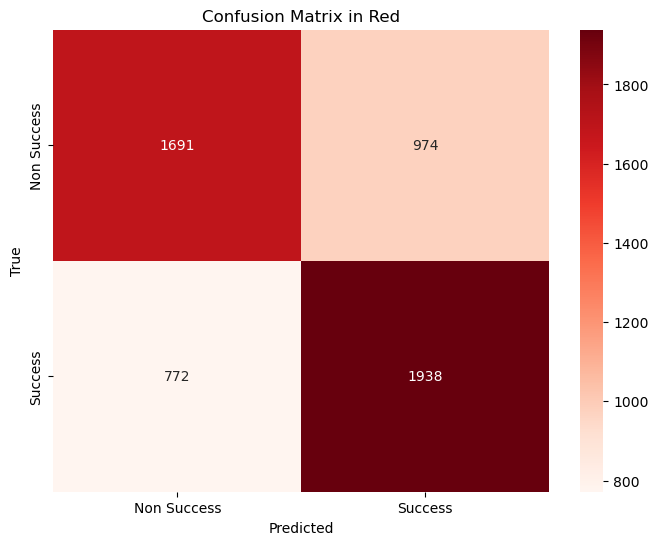

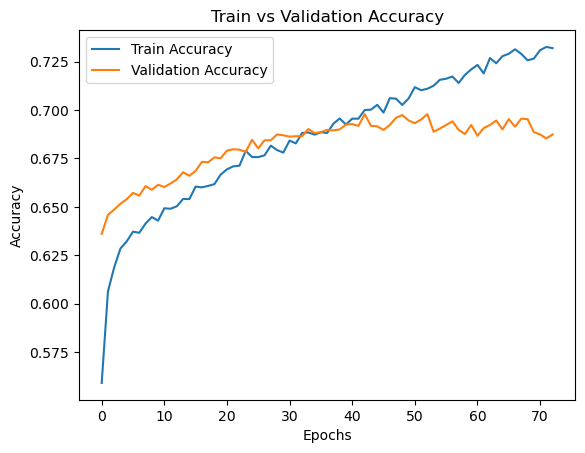

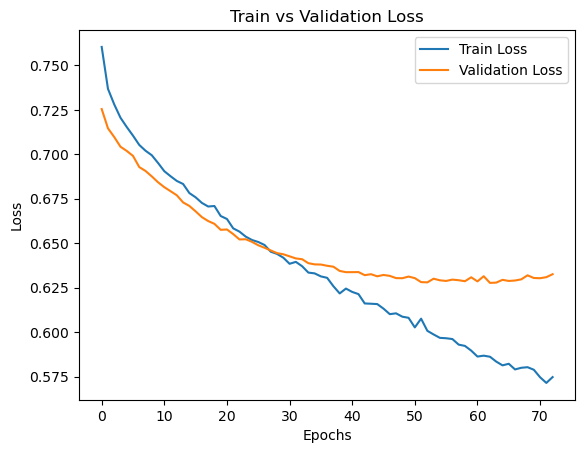

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

#costruisco il modello con regolarizzazione L2 ridge ed Early Stopping
def build_model(hp):
    model = Sequential()
    
    #1st hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1))) #dropout


    #3rd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate3', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #4th hidden layer
    model.add(Dense(
        units=hp.Int('units_layer4', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate4', min_value=0.1, max_value=0.5, step=0.1))) #dropout

    #output layer
    model.add(Dense(1, activation='sigmoid'))

    #compilazione
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

#early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', #monitora validation loss
    patience=10, #patience = numero di epoch senza miglioramento prima di fermarsi
    restore_best_weights=True # = ripristina i pesi del modello con la miglior performance
)

#configuro random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_final_dir/final_tuning',  # Dove salvare i risultati
    project_name=f'fold_{fold}',  # Nome del progetto per il tuner
    overwrite=True  # Impostato su True per evitare che venga ricaricato un tuner precedente
)
    
#ricerca degli iperparametri
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
#stampa dei migliori parametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Migliori iperparametri trovati")
print(f" - Unità nel primo livello: {best_hps.get('units_layer1')}")
print(f" - Unità nel secondo livello: {best_hps.get('units_layer2')}")
print(f" - Tasso di dropout 1: {best_hps.get('dropout_rate1')}")
print(f" - Tasso di dropout 2: {best_hps.get('dropout_rate2')}")
print(f" - L2 rate: {best_hps.get('l2_rate')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

#costruisco il modello usando i parametri migliori
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

#valutazione sul test set
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

#classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Non Success', 'Success'], yticklabels=['Non Success', 'Success'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix in Red')
plt.show()

#a seguito, visualizzazione dei plot della cronologia dell'addestramento: accuracy e loss
    
#accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

Trial 5 Complete [00h 00m 54s]
val_accuracy: 0.7093023061752319

Best val_accuracy So Far: 0.7197674512863159
Total elapsed time: 00h 02m 13s
Migliori iperparametri trovati
 - Unità nel primo livello: 224
 - Unità nel secondo livello: 64
 - Tasso di dropout 1: 0.4
 - Tasso di dropout 2: 0.1
 - L2 rate: 1.199438615272308e-05
 - Learning rate: 0.001
Epoch 1/100
538/538 [==============================] - 1s 742us/step - loss: 0.6604 - accuracy: 0.5988 - val_loss: 0.6362 - val_accuracy: 0.6305
Epoch 2/100
538/538 [==============================] - 0s 648us/step - loss: 0.6340 - accuracy: 0.6352 - val_loss: 0.6222 - val_accuracy: 0.6477
Epoch 3/100
538/538 [==============================] - 0s 645us/step - loss: 0.6205 - accuracy: 0.6444 - val_loss: 0.6144 - val_accuracy: 0.6502
Epoch 4/100
538/538 [==============================] - 0s 644us/step - loss: 0.6138 - accuracy: 0.6538 - val_loss: 0.6131 - val_accuracy: 0.6560
Epoch 5/100
538/538 [==============================] - 0s 645us/step -

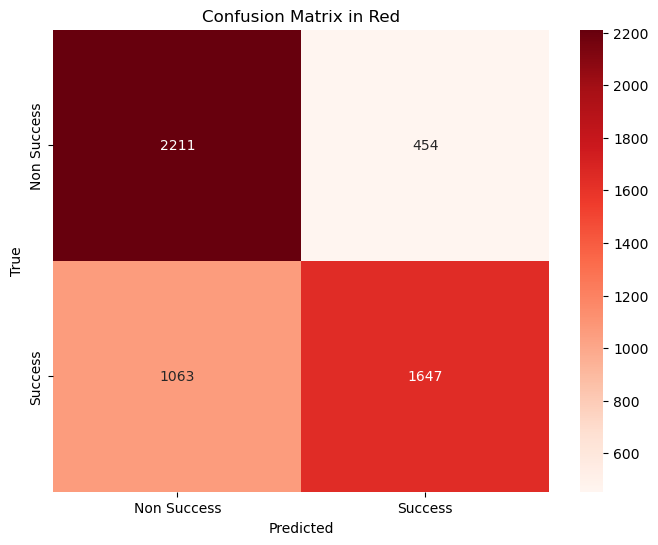

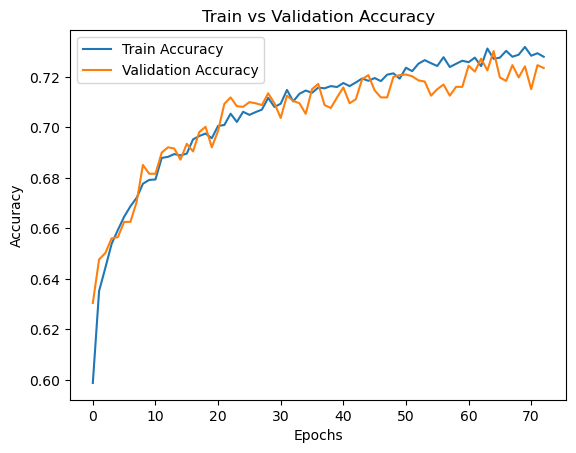

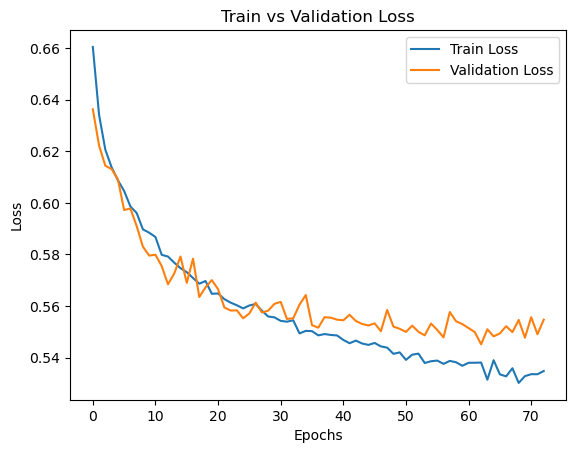

In [31]:
blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

X = df[blockchain_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

#costruisco il modello con regolarizzazione L2 ridge ed Early Stopping
def build_model(hp):
    model = Sequential()
    
    #1st hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1))) #dropout


    #3rd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate3', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #4th hidden layer
    model.add(Dense(
        units=hp.Int('units_layer4', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate4', min_value=0.1, max_value=0.5, step=0.1))) #dropout

    #output layer
    model.add(Dense(1, activation='sigmoid'))

    #compilazione
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

#early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', #monitora validation loss
    patience=10, #patience = numero di epoch senza miglioramento prima di fermarsi
    restore_best_weights=True # = ripristina i pesi del modello con la miglior performance
)

#configuro random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_final_dir/final_tuning',  # Dove salvare i risultati
    project_name=f'fold_{fold}',  # Nome del progetto per il tuner
    overwrite=True  # Impostato su True per evitare che venga ricaricato un tuner precedente
)
    
#ricerca degli iperparametri
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
#stampa dei migliori parametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Migliori iperparametri trovati")
print(f" - Unità nel primo livello: {best_hps.get('units_layer1')}")
print(f" - Unità nel secondo livello: {best_hps.get('units_layer2')}")
print(f" - Tasso di dropout 1: {best_hps.get('dropout_rate1')}")
print(f" - Tasso di dropout 2: {best_hps.get('dropout_rate2')}")
print(f" - L2 rate: {best_hps.get('l2_rate')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

#costruisco il modello usando i parametri migliori
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

#valutazione sul test set
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

#classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Non Success', 'Success'], yticklabels=['Non Success', 'Success'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix in Red')
plt.show()

#a seguito, visualizzazione dei plot della cronologia dell'addestramento: accuracy e loss
    
#accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

Trial 5 Complete [00h 00m 46s]
val_accuracy: 0.7402325868606567

Best val_accuracy So Far: 0.7402325868606567
Total elapsed time: 00h 01m 59s
Migliori iperparametri trovati
 - Unità nel primo livello: 96
 - Unità nel secondo livello: 256
 - Tasso di dropout 1: 0.30000000000000004
 - Tasso di dropout 2: 0.5
 - L2 rate: 0.00021355793561470628
 - Learning rate: 0.0001
Epoch 1/100
538/538 [==============================] - 1s 910us/step - loss: 0.7917 - accuracy: 0.5509 - val_loss: 0.7576 - val_accuracy: 0.6333
Epoch 2/100
538/538 [==============================] - 0s 804us/step - loss: 0.7637 - accuracy: 0.6074 - val_loss: 0.7350 - val_accuracy: 0.6449
Epoch 3/100
538/538 [==============================] - 0s 803us/step - loss: 0.7494 - accuracy: 0.6251 - val_loss: 0.7221 - val_accuracy: 0.6516
Epoch 4/100
538/538 [==============================] - 0s 804us/step - loss: 0.7326 - accuracy: 0.6391 - val_loss: 0.7122 - val_accuracy: 0.6600
Epoch 5/100
538/538 [==============================]

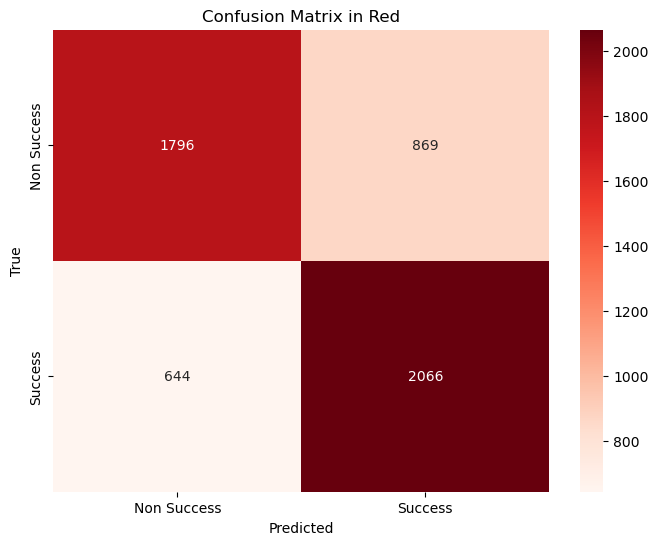

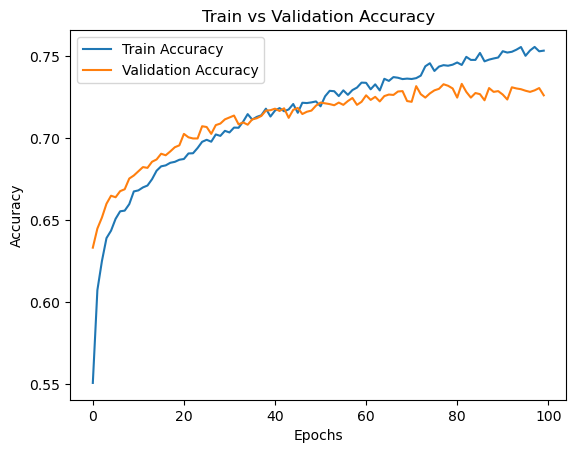

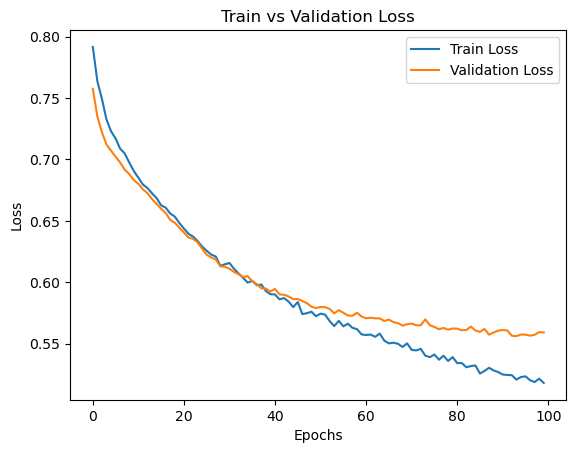

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
    'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
    'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
    'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
    'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
    'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
    'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
    'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
    'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
    'week_google_searches_ethereum','week_google_searches_optimism']

X = df[all_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

#costruisco il modello con regolarizzazione L2 ridge ed Early Stopping
def build_model(hp):
    model = Sequential()
    
    #1st hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1))) #dropout


    #3rd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate3', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #4th hidden layer
    model.add(Dense(
        units=hp.Int('units_layer4', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate4', min_value=0.1, max_value=0.5, step=0.1))) #dropout

    #output layer
    model.add(Dense(1, activation='sigmoid'))

    #compilazione
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

#early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', #monitora validation loss
    patience=10, #patience = numero di epoch senza miglioramento prima di fermarsi
    restore_best_weights=True # = ripristina i pesi del modello con la miglior performance
)

#configuro random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_final_dir/final_tuning',  # Dove salvare i risultati
    project_name=f'fold_{fold}',  # Nome del progetto per il tuner
    overwrite=True  # Impostato su True per evitare che venga ricaricato un tuner precedente
)
    
#ricerca degli iperparametri
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
#stampa dei migliori parametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Migliori iperparametri trovati")
print(f" - Unità nel primo livello: {best_hps.get('units_layer1')}")
print(f" - Unità nel secondo livello: {best_hps.get('units_layer2')}")
print(f" - Tasso di dropout 1: {best_hps.get('dropout_rate1')}")
print(f" - Tasso di dropout 2: {best_hps.get('dropout_rate2')}")
print(f" - L2 rate: {best_hps.get('l2_rate')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

#costruisco il modello usando i parametri migliori
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

#valutazione sul test set
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

#classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Non Success', 'Success'], yticklabels=['Non Success', 'Success'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix in Red')
plt.show()

#a seguito, visualizzazione dei plot della cronologia dell'addestramento: accuracy e loss
    
#accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

<h1 style="color:red;">MLP - 3 classi</h1>

Trial 5 Complete [00h 00m 34s]
val_accuracy: 0.5490697622299194

Best val_accuracy So Far: 0.5588372349739075
Total elapsed time: 00h 02m 11s
Migliori iperparametri trovati
 - Unità nel primo livello: 192
 - Unità nel secondo livello: 32
 - Tasso di dropout 1: 0.4
 - Tasso di dropout 2: 0.1
 - L2 rate: 1.4452060716247522e-05
 - Learning rate: 0.001
Epoch 1/100
538/538 [==============================] - 1s 795us/step - loss: 1.0290 - accuracy: 0.4905 - val_loss: 1.0078 - val_accuracy: 0.5177
Epoch 2/100
538/538 [==============================] - 0s 684us/step - loss: 1.0064 - accuracy: 0.5161 - val_loss: 0.9996 - val_accuracy: 0.5191
Epoch 3/100
538/538 [==============================] - 0s 681us/step - loss: 1.0025 - accuracy: 0.5151 - val_loss: 0.9985 - val_accuracy: 0.5251
Epoch 4/100
538/538 [==============================] - 0s 682us/step - loss: 0.9918 - accuracy: 0.5259 - val_loss: 0.9857 - val_accuracy: 0.5263
Epoch 5/100
538/538 [==============================] - 0s 678us/step 

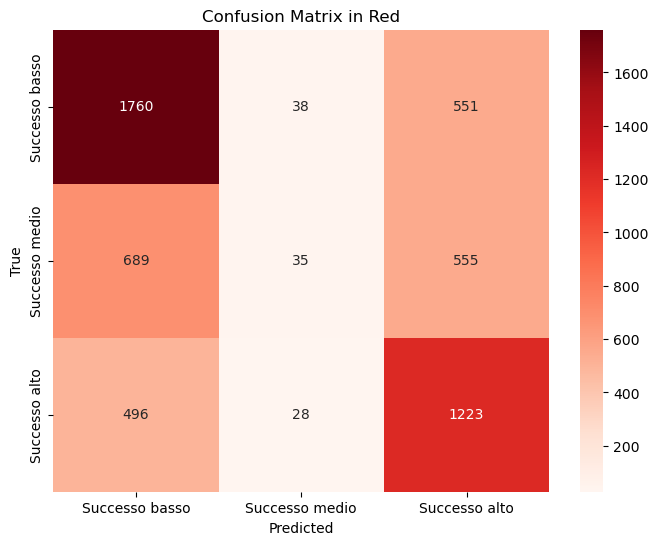

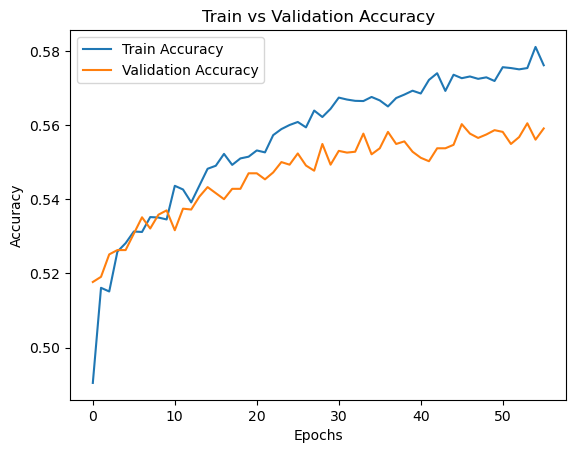

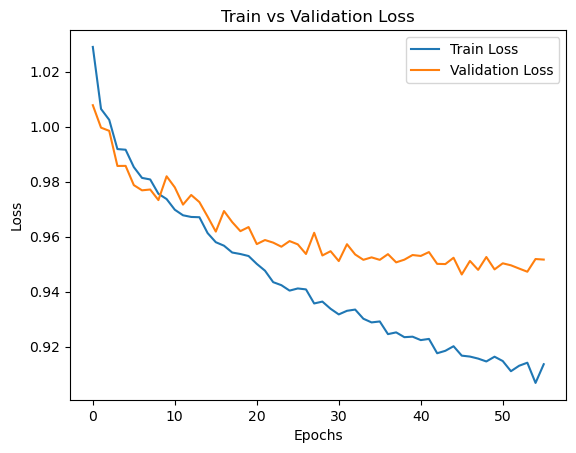

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessClass3']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

from tensorflow.keras.utils import to_categorical

# One-hot encoding delle etichette
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

#costruisco il modello con regolarizzazione L2 ridge ed Early Stopping
def build_model(hp):
    model = Sequential()
    
    #1st hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1))) #dropout


    #3rd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate3', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #4th hidden layer
    model.add(Dense(
        units=hp.Int('units_layer4', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate4', min_value=0.1, max_value=0.5, step=0.1))) #dropout

    #output layer
    model.add(Dense(3, activation='softmax'))

    #compilazione
    model.compile(
    optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
    loss='categorical_crossentropy',  # Cambiato da binary_crossentropy
    metrics=['accuracy']
    )
    
    return model

#early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', #monitora validation loss
    patience=10, #patience = numero di epoch senza miglioramento prima di fermarsi
    restore_best_weights=True # = ripristina i pesi del modello con la miglior performance
)

#configuro random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_final_dir/final_tuning',  # Dove salvare i risultati
    project_name=f'fold_{fold}',  # Nome del progetto per il tuner
    overwrite=True  # Impostato su True per evitare che venga ricaricato un tuner precedente
)
    
#ricerca degli iperparametri
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
#stampa dei migliori parametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Migliori iperparametri trovati")
print(f" - Unità nel primo livello: {best_hps.get('units_layer1')}")
print(f" - Unità nel secondo livello: {best_hps.get('units_layer2')}")
print(f" - Tasso di dropout 1: {best_hps.get('dropout_rate1')}")
print(f" - Tasso di dropout 2: {best_hps.get('dropout_rate2')}")
print(f" - L2 rate: {best_hps.get('l2_rate')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

#costruisco il modello usando i parametri migliori
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

#valutazione sul test set
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1) #da y_pred = (y_pred_proba > 0.5).astype(int) nel caso binario

#converto le etichette y_test e y_pred da one-hot encoded a formato multiclass, se necessario
# Assicurati che y_test sia in formato 'multiclass'
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # One-hot encoded
    y_test = np.argmax(y_test, axis=1)  # Converti in etichette singole

# Verifica che y_pred sia già in formato 'multiclass'
if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:  # One-hot encoded
    y_pred = np.argmax(y_pred, axis=1)  # Converti in etichette singole

#classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Successo basso', 'Successo medio', 'Successo alto'], yticklabels=['Successo basso', 'Successo medio', 'Successo alto'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix in Red')
plt.show()

#a seguito, visualizzazione dei plot della cronologia dell'addestramento: accuracy e loss
    
#accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

Trial 5 Complete [00h 00m 20s]
val_accuracy: 0.6193023324012756

Best val_accuracy So Far: 0.6262790560722351
Total elapsed time: 00h 01m 32s
Migliori iperparametri trovati
 - Unità nel primo livello: 128
 - Unità nel secondo livello: 192
 - Tasso di dropout 1: 0.30000000000000004
 - Tasso di dropout 2: 0.4
 - L2 rate: 2.8867594454466988e-05
 - Learning rate: 0.001
Epoch 1/100
538/538 [==============================] - 1s 1ms/step - loss: 1.0557 - accuracy: 0.4876 - val_loss: 1.0170 - val_accuracy: 0.5342
Epoch 2/100
538/538 [==============================] - 1s 1ms/step - loss: 1.0097 - accuracy: 0.5258 - val_loss: 0.9886 - val_accuracy: 0.5386
Epoch 3/100
538/538 [==============================] - 1s 1ms/step - loss: 0.9954 - accuracy: 0.5358 - val_loss: 0.9792 - val_accuracy: 0.5505
Epoch 4/100
538/538 [==============================] - 1s 1ms/step - loss: 0.9815 - accuracy: 0.5440 - val_loss: 0.9583 - val_accuracy: 0.5667
Epoch 5/100
538/538 [==============================] - 1s 1m

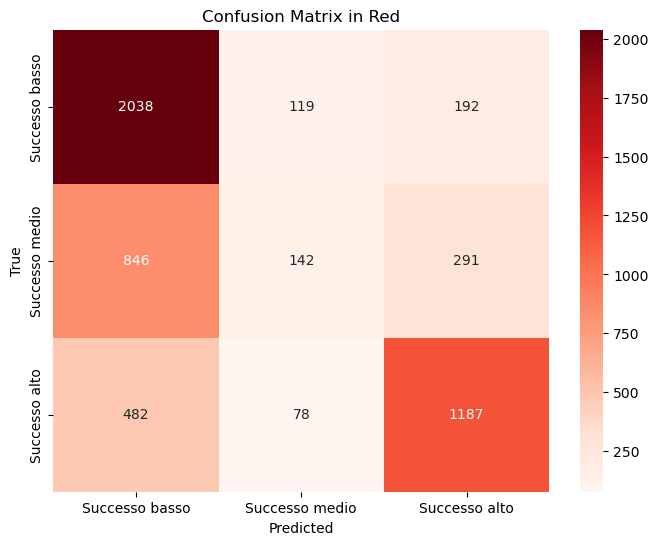

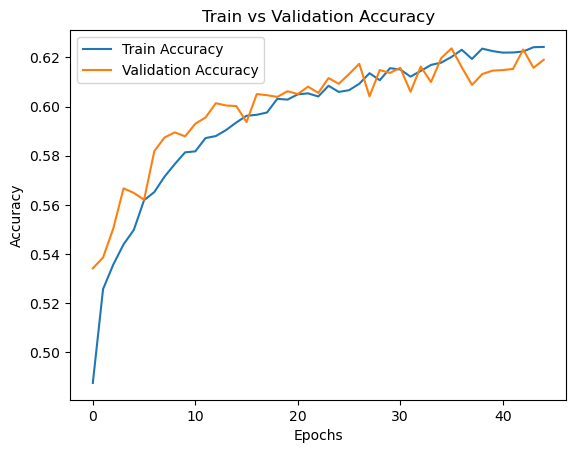

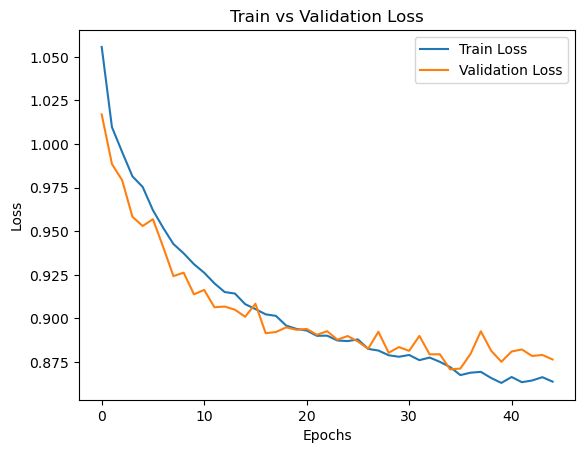

In [58]:
blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

X = df[blockchain_features]
y = df['SuccessClass3']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

from tensorflow.keras.utils import to_categorical

# One-hot encoding delle etichette
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

#costruisco il modello con regolarizzazione L2 ridge ed Early Stopping
def build_model(hp):
    model = Sequential()
    
    #1st hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1))) #dropout


    #3rd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate3', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #4th hidden layer
    model.add(Dense(
        units=hp.Int('units_layer4', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate4', min_value=0.1, max_value=0.5, step=0.1))) #dropout

    #output layer
    model.add(Dense(3, activation='softmax'))

    #compilazione
    model.compile(
    optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
    loss='categorical_crossentropy',  # Cambiato da binary_crossentropy
    metrics=['accuracy']
    )
    
    return model

#early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', #monitora validation loss
    patience=10, #patience = numero di epoch senza miglioramento prima di fermarsi
    restore_best_weights=True # = ripristina i pesi del modello con la miglior performance
)

#configuro random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_final_dir/final_tuning',  # Dove salvare i risultati
    project_name=f'fold_{fold}',  # Nome del progetto per il tuner
    overwrite=True  # Impostato su True per evitare che venga ricaricato un tuner precedente
)
    
#ricerca degli iperparametri
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
#stampa dei migliori parametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Migliori iperparametri trovati")
print(f" - Unità nel primo livello: {best_hps.get('units_layer1')}")
print(f" - Unità nel secondo livello: {best_hps.get('units_layer2')}")
print(f" - Tasso di dropout 1: {best_hps.get('dropout_rate1')}")
print(f" - Tasso di dropout 2: {best_hps.get('dropout_rate2')}")
print(f" - L2 rate: {best_hps.get('l2_rate')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

#costruisco il modello usando i parametri migliori
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

#valutazione sul test set
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1) #da y_pred = (y_pred_proba > 0.5).astype(int) nel caso binario

#converto le etichette y_test e y_pred da one-hot encoded a formato multiclass, se necessario
# Assicurati che y_test sia in formato 'multiclass'
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # One-hot encoded
    y_test = np.argmax(y_test, axis=1)  # Converti in etichette singole

# Verifica che y_pred sia già in formato 'multiclass'
if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:  # One-hot encoded
    y_pred = np.argmax(y_pred, axis=1)  # Converti in etichette singole

#classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Successo basso', 'Successo medio', 'Successo alto'], yticklabels=['Successo basso', 'Successo medio', 'Successo alto'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix in Red')
plt.show()

#a seguito, visualizzazione dei plot della cronologia dell'addestramento: accuracy e loss
    
#accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

Trial 5 Complete [00h 00m 08s]
val_accuracy: 0.5465116500854492

Best val_accuracy So Far: 0.6237209439277649
Total elapsed time: 00h 01m 44s
Migliori iperparametri trovati
 - Unità nel primo livello: 256
 - Unità nel secondo livello: 64
 - Tasso di dropout 1: 0.5
 - Tasso di dropout 2: 0.30000000000000004
 - L2 rate: 0.0001461171971454041
 - Learning rate: 0.0001
Epoch 1/100
538/538 [==============================] - 1s 875us/step - loss: 1.2022 - accuracy: 0.3983 - val_loss: 1.1227 - val_accuracy: 0.4953
Epoch 2/100
538/538 [==============================] - 0s 780us/step - loss: 1.1279 - accuracy: 0.4483 - val_loss: 1.0988 - val_accuracy: 0.5151
Epoch 3/100
538/538 [==============================] - 0s 779us/step - loss: 1.1077 - accuracy: 0.4685 - val_loss: 1.0836 - val_accuracy: 0.5198
Epoch 4/100
538/538 [==============================] - 0s 778us/step - loss: 1.0951 - accuracy: 0.4928 - val_loss: 1.0730 - val_accuracy: 0.5265
Epoch 5/100
538/538 [==============================] 

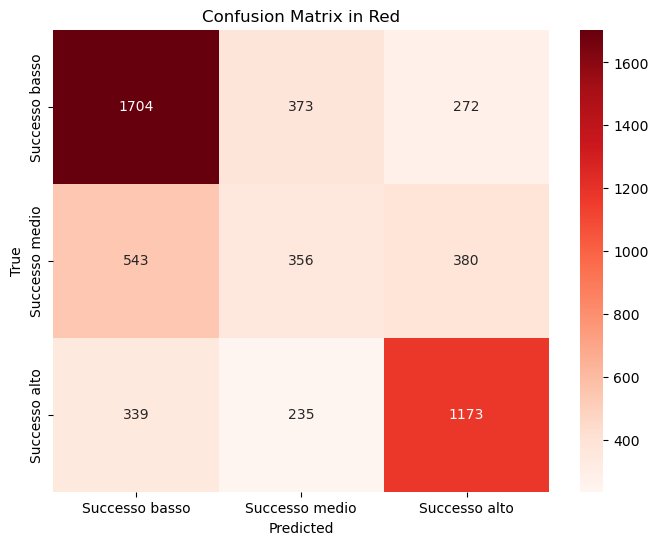

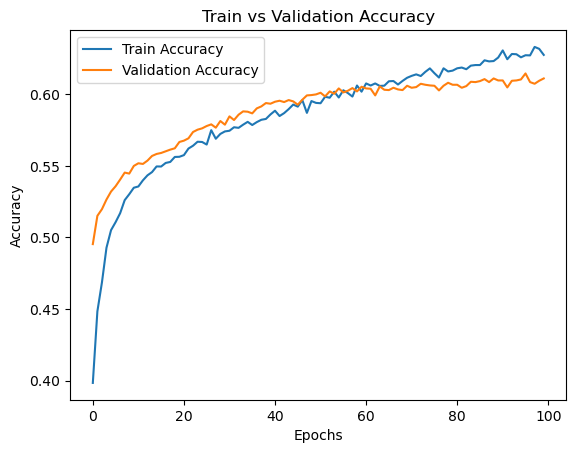

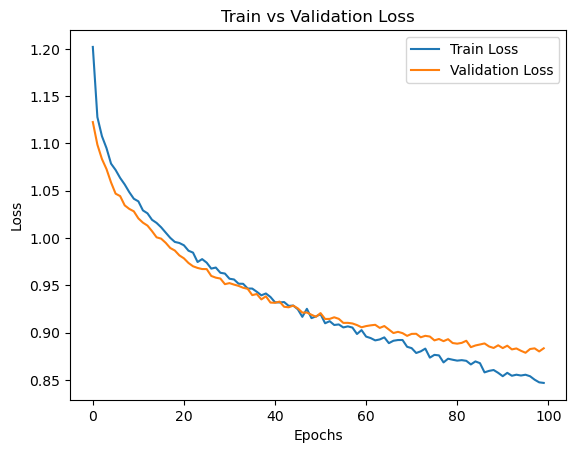

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
    'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
    'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
    'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
    'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
    'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
    'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
    'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
    'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
    'week_google_searches_ethereum','week_google_searches_optimism']

X = df[all_features]
y = df['SuccessClass3']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

from tensorflow.keras.utils import to_categorical

# One-hot encoding delle etichette
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

#costruisco il modello con regolarizzazione L2 ridge ed Early Stopping
def build_model(hp):
    model = Sequential()
    
    #1st hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1))) #dropout


    #3rd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate3', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #4th hidden layer
    model.add(Dense(
        units=hp.Int('units_layer4', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate4', min_value=0.1, max_value=0.5, step=0.1))) #dropout

    #output layer
    model.add(Dense(3, activation='softmax'))

    #compilazione
    model.compile(
    optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
    loss='categorical_crossentropy',  # Cambiato da binary_crossentropy
    metrics=['accuracy']
    )
    
    return model

#early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', #monitora validation loss
    patience=10, #patience = numero di epoch senza miglioramento prima di fermarsi
    restore_best_weights=True # = ripristina i pesi del modello con la miglior performance
)

#configuro random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_final_dir/final_tuning',  # Dove salvare i risultati
    project_name=f'fold_{fold}',  # Nome del progetto per il tuner
    overwrite=True  # Impostato su True per evitare che venga ricaricato un tuner precedente
)
    
#ricerca degli iperparametri
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
#stampa dei migliori parametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Migliori iperparametri trovati")
print(f" - Unità nel primo livello: {best_hps.get('units_layer1')}")
print(f" - Unità nel secondo livello: {best_hps.get('units_layer2')}")
print(f" - Tasso di dropout 1: {best_hps.get('dropout_rate1')}")
print(f" - Tasso di dropout 2: {best_hps.get('dropout_rate2')}")
print(f" - L2 rate: {best_hps.get('l2_rate')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

#costruisco il modello usando i parametri migliori
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

#valutazione sul test set
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1) #da y_pred = (y_pred_proba > 0.5).astype(int) nel caso binario

#converto le etichette y_test e y_pred da one-hot encoded a formato multiclass, se necessario
# Assicurati che y_test sia in formato 'multiclass'
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # One-hot encoded
    y_test = np.argmax(y_test, axis=1)  # Converti in etichette singole

# Verifica che y_pred sia già in formato 'multiclass'
if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:  # One-hot encoded
    y_pred = np.argmax(y_pred, axis=1)  # Converti in etichette singole

#classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Successo basso', 'Successo medio', 'Successo alto'], yticklabels=['Successo basso', 'Successo medio', 'Successo alto'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix in Red')
plt.show()

#a seguito, visualizzazione dei plot della cronologia dell'addestramento: accuracy e loss
    
#accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

<h1 style="color:red;">MLP - 4 classi</h1>

Trial 5 Complete [00h 00m 20s]
val_accuracy: 0.4130232632160187

Best val_accuracy So Far: 0.44325581192970276
Total elapsed time: 00h 02m 12s
Migliori iperparametri trovati
 - Unità nel primo livello: 224
 - Unità nel secondo livello: 160
 - Tasso di dropout 1: 0.1
 - Tasso di dropout 2: 0.30000000000000004
 - L2 rate: 0.00013270762689687073
 - Learning rate: 0.0001
Epoch 1/100
538/538 [==============================] - 1s 1ms/step - loss: 1.4248 - accuracy: 0.3558 - val_loss: 1.3822 - val_accuracy: 0.3886
Epoch 2/100
538/538 [==============================] - 1s 1000us/step - loss: 1.3908 - accuracy: 0.3884 - val_loss: 1.3706 - val_accuracy: 0.3991
Epoch 3/100
538/538 [==============================] - 1s 1000us/step - loss: 1.3793 - accuracy: 0.3976 - val_loss: 1.3651 - val_accuracy: 0.4026
Epoch 4/100
538/538 [==============================] - 1s 992us/step - loss: 1.3699 - accuracy: 0.4043 - val_loss: 1.3620 - val_accuracy: 0.4042
Epoch 5/100
538/538 [=============================

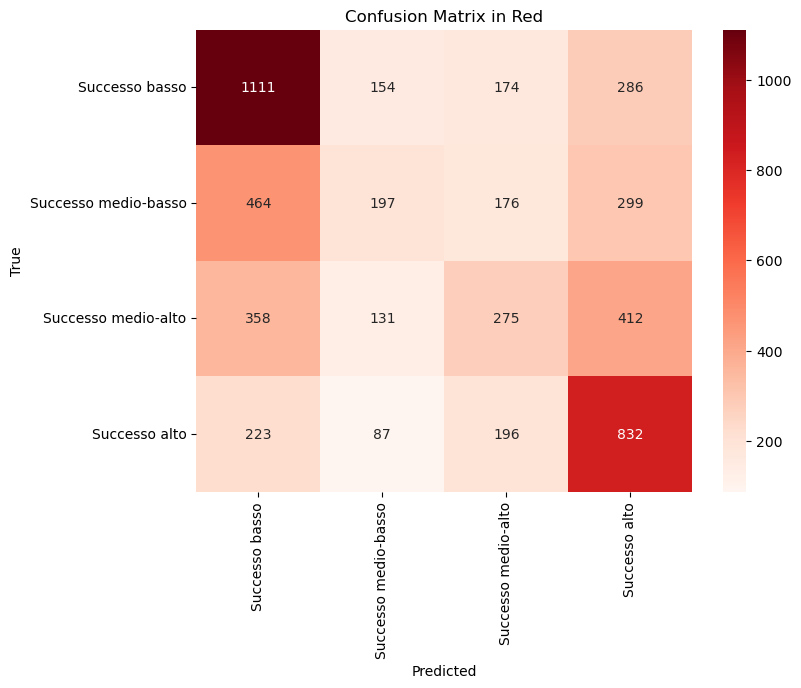

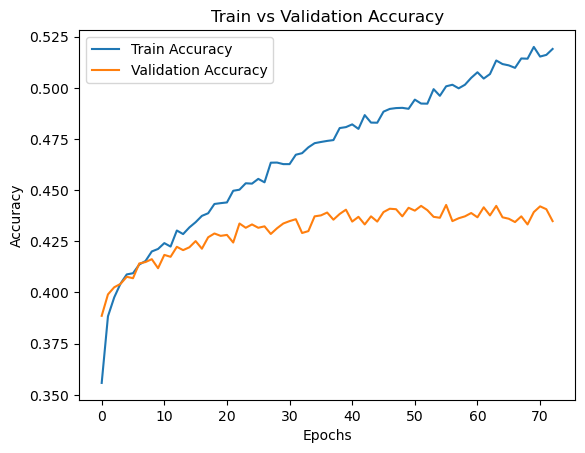

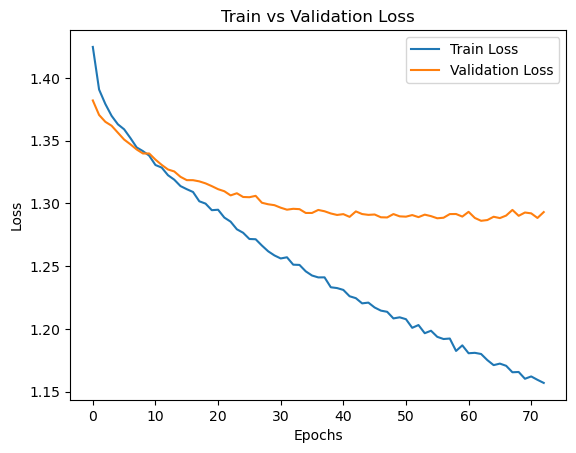

In [65]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessClass4']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

from tensorflow.keras.utils import to_categorical

# One-hot encoding delle etichette
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

#costruisco il modello con regolarizzazione L2 ridge ed Early Stopping
def build_model(hp):
    model = Sequential()
    
    #1st hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1))) #dropout


    #3rd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate3', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #4th hidden layer
    model.add(Dense(
        units=hp.Int('units_layer4', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate4', min_value=0.1, max_value=0.5, step=0.1))) #dropout

    #output layer
    model.add(Dense(4, activation='softmax'))

    #compilazione
    model.compile(
    optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
    loss='categorical_crossentropy',  # Cambiato da binary_crossentropy
    metrics=['accuracy']
    )
    
    return model

#early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', #monitora validation loss
    patience=10, #patience = numero di epoch senza miglioramento prima di fermarsi
    restore_best_weights=True # = ripristina i pesi del modello con la miglior performance
)

#configuro random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_final_dir/final_tuning',  # Dove salvare i risultati
    project_name=f'fold_{fold}',  # Nome del progetto per il tuner
    overwrite=True  # Impostato su True per evitare che venga ricaricato un tuner precedente
)
    
#ricerca degli iperparametri
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
#stampa dei migliori parametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Migliori iperparametri trovati")
print(f" - Unità nel primo livello: {best_hps.get('units_layer1')}")
print(f" - Unità nel secondo livello: {best_hps.get('units_layer2')}")
print(f" - Tasso di dropout 1: {best_hps.get('dropout_rate1')}")
print(f" - Tasso di dropout 2: {best_hps.get('dropout_rate2')}")
print(f" - L2 rate: {best_hps.get('l2_rate')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

#costruisco il modello usando i parametri migliori
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

#valutazione sul test set
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1) #da y_pred = (y_pred_proba > 0.5).astype(int) nel caso binario

#converto le etichette y_test e y_pred da one-hot encoded a formato multiclass, se necessario
# Assicurati che y_test sia in formato 'multiclass'
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # One-hot encoded
    y_test = np.argmax(y_test, axis=1)  # Converti in etichette singole

# Verifica che y_pred sia già in formato 'multiclass'
if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:  # One-hot encoded
    y_pred = np.argmax(y_pred, axis=1)  # Converti in etichette singole

#classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Successo basso', 'Successo medio-basso', 'Successo medio-alto', 'Successo alto'], yticklabels=['Successo basso', 'Successo medio-basso', 'Successo medio-alto', 'Successo alto'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix in Red')
plt.show()

#a seguito, visualizzazione dei plot della cronologia dell'addestramento: accuracy e loss
    
#accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

Trial 5 Complete [00h 00m 40s]
val_accuracy: 0.4858139455318451

Best val_accuracy So Far: 0.5048837065696716
Total elapsed time: 00h 03m 06s
Migliori iperparametri trovati
 - Unità nel primo livello: 256
 - Unità nel secondo livello: 256
 - Tasso di dropout 1: 0.1
 - Tasso di dropout 2: 0.2
 - L2 rate: 5.789858307284032e-05
 - Learning rate: 0.0001
Epoch 1/100
538/538 [==============================] - 1s 961us/step - loss: 1.4014 - accuracy: 0.3107 - val_loss: 1.3694 - val_accuracy: 0.3772
Epoch 2/100
538/538 [==============================] - 0s 867us/step - loss: 1.3681 - accuracy: 0.3643 - val_loss: 1.3372 - val_accuracy: 0.3912
Epoch 3/100
538/538 [==============================] - 0s 866us/step - loss: 1.3479 - accuracy: 0.3819 - val_loss: 1.3232 - val_accuracy: 0.3979
Epoch 4/100
538/538 [==============================] - 0s 868us/step - loss: 1.3326 - accuracy: 0.3978 - val_loss: 1.3056 - val_accuracy: 0.4047
Epoch 5/100
538/538 [==============================] - 0s 869us/step

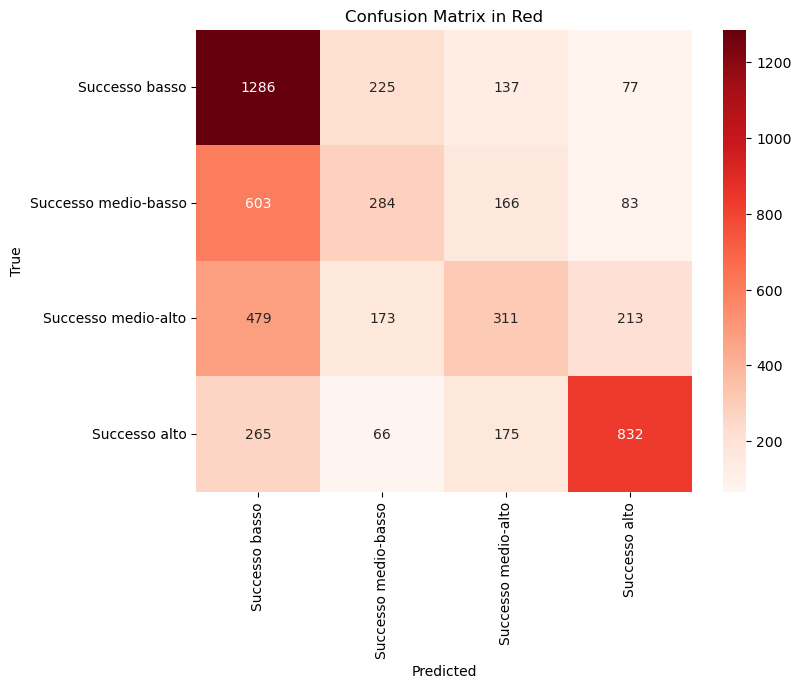

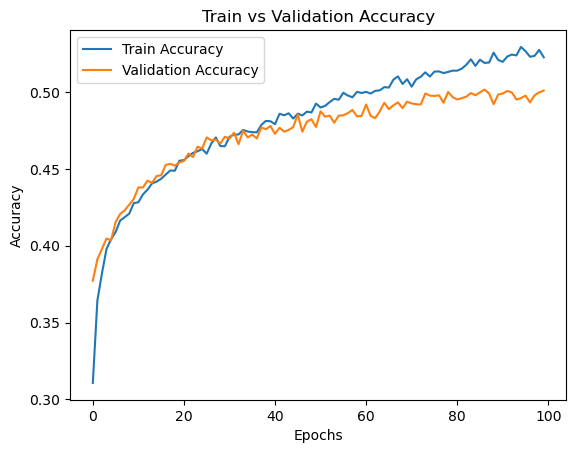

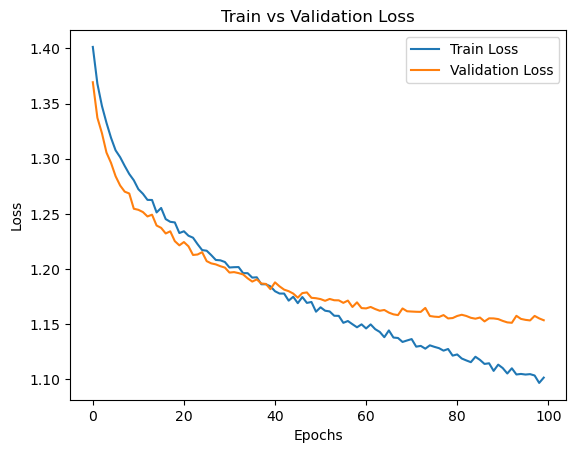

In [66]:
blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

X = df[blockchain_features]
y = df['SuccessClass4']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

from tensorflow.keras.utils import to_categorical

# One-hot encoding delle etichette
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

#costruisco il modello con regolarizzazione L2 ridge ed Early Stopping
def build_model(hp):
    model = Sequential()
    
    #1st hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1))) #dropout


    #3rd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate3', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #4th hidden layer
    model.add(Dense(
        units=hp.Int('units_layer4', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate4', min_value=0.1, max_value=0.5, step=0.1))) #dropout

    #output layer
    model.add(Dense(4, activation='softmax'))

    #compilazione
    model.compile(
    optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
    loss='categorical_crossentropy',  # Cambiato da binary_crossentropy
    metrics=['accuracy']
    )
    
    return model

#early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', #monitora validation loss
    patience=10, #patience = numero di epoch senza miglioramento prima di fermarsi
    restore_best_weights=True # = ripristina i pesi del modello con la miglior performance
)

#configuro random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_final_dir/final_tuning',  # Dove salvare i risultati
    project_name=f'fold_{fold}',  # Nome del progetto per il tuner
    overwrite=True  # Impostato su True per evitare che venga ricaricato un tuner precedente
)
    
#ricerca degli iperparametri
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
#stampa dei migliori parametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Migliori iperparametri trovati")
print(f" - Unità nel primo livello: {best_hps.get('units_layer1')}")
print(f" - Unità nel secondo livello: {best_hps.get('units_layer2')}")
print(f" - Tasso di dropout 1: {best_hps.get('dropout_rate1')}")
print(f" - Tasso di dropout 2: {best_hps.get('dropout_rate2')}")
print(f" - L2 rate: {best_hps.get('l2_rate')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

#costruisco il modello usando i parametri migliori
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

#valutazione sul test set
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1) #da y_pred = (y_pred_proba > 0.5).astype(int) nel caso binario

#converto le etichette y_test e y_pred da one-hot encoded a formato multiclass, se necessario
# Assicurati che y_test sia in formato 'multiclass'
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # One-hot encoded
    y_test = np.argmax(y_test, axis=1)  # Converti in etichette singole

# Verifica che y_pred sia già in formato 'multiclass'
if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:  # One-hot encoded
    y_pred = np.argmax(y_pred, axis=1)  # Converti in etichette singole

#classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Successo basso', 'Successo medio-basso', 'Successo medio-alto', 'Successo alto'], yticklabels=['Successo basso', 'Successo medio-basso', 'Successo medio-alto', 'Successo alto'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix in Red')
plt.show()

#a seguito, visualizzazione dei plot della cronologia dell'addestramento: accuracy e loss
    
#accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

Trial 5 Complete [00h 00m 34s]
val_accuracy: 0.49162790179252625

Best val_accuracy So Far: 0.5053488612174988
Total elapsed time: 00h 01m 37s
Migliori iperparametri trovati
 - Unità nel primo livello: 160
 - Unità nel secondo livello: 224
 - Tasso di dropout 1: 0.5
 - Tasso di dropout 2: 0.1
 - L2 rate: 4.766661824507126e-05
 - Learning rate: 0.001
Epoch 1/100
538/538 [==============================] - 1s 1ms/step - loss: 1.3570 - accuracy: 0.3769 - val_loss: 1.2930 - val_accuracy: 0.4144
Epoch 2/100
538/538 [==============================] - 0s 898us/step - loss: 1.3037 - accuracy: 0.4158 - val_loss: 1.2655 - val_accuracy: 0.4284
Epoch 3/100
538/538 [==============================] - 0s 913us/step - loss: 1.2747 - accuracy: 0.4305 - val_loss: 1.2535 - val_accuracy: 0.4395
Epoch 4/100
538/538 [==============================] - 0s 876us/step - loss: 1.2671 - accuracy: 0.4344 - val_loss: 1.2374 - val_accuracy: 0.4386
Epoch 5/100
538/538 [==============================] - 1s 929us/step -

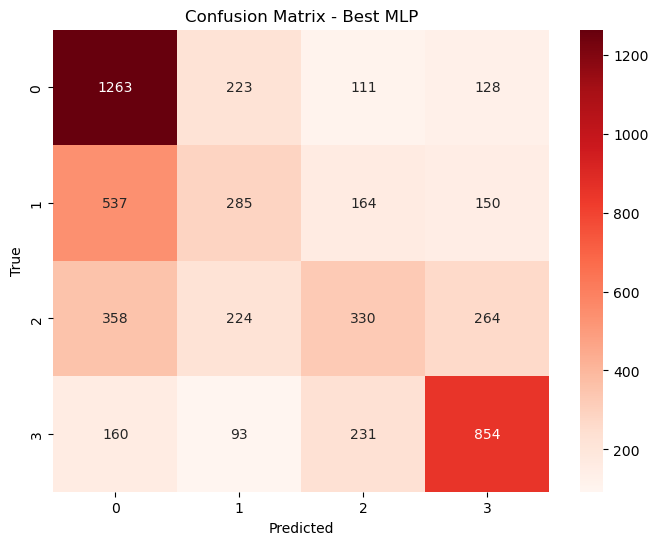

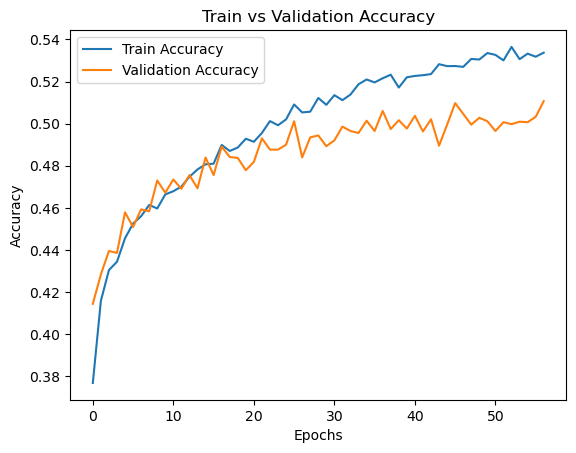

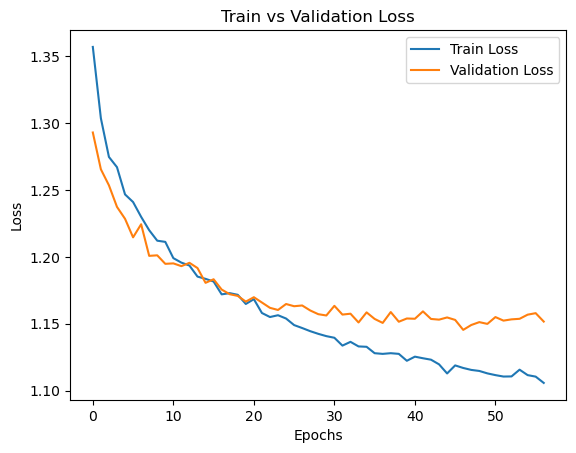

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
    'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
    'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
    'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
    'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
    'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
    'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
    'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
    'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
    'week_google_searches_ethereum','week_google_searches_optimism']

X = df[all_features]
y = df['SuccessClass4']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

from tensorflow.keras.utils import to_categorical

# One-hot encoding delle etichette
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

#costruisco il modello con regolarizzazione L2 ridge ed Early Stopping
def build_model(hp):
    model = Sequential()
    
    #1st hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1))) #dropout


    #3rd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate3', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #4th hidden layer
    model.add(Dense(
        units=hp.Int('units_layer4', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate4', min_value=0.1, max_value=0.5, step=0.1))) #dropout

    #output layer
    model.add(Dense(4, activation='softmax'))

    #compilazione
    model.compile(
    optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
    loss='categorical_crossentropy',  # Cambiato da binary_crossentropy
    metrics=['accuracy']
    )
    
    return model

#early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', #monitora validation loss
    patience=10, #patience = numero di epoch senza miglioramento prima di fermarsi
    restore_best_weights=True # = ripristina i pesi del modello con la miglior performance
)

#configuro random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_final_dir/final_tuning',  # Dove salvare i risultati
    project_name=f'fold_{fold}',  # Nome del progetto per il tuner
    overwrite=True  # Impostato su True per evitare che venga ricaricato un tuner precedente
)
    
#ricerca degli iperparametri
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
#stampa dei migliori parametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Migliori iperparametri trovati")
print(f" - Unità nel primo livello: {best_hps.get('units_layer1')}")
print(f" - Unità nel secondo livello: {best_hps.get('units_layer2')}")
print(f" - Tasso di dropout 1: {best_hps.get('dropout_rate1')}")
print(f" - Tasso di dropout 2: {best_hps.get('dropout_rate2')}")
print(f" - L2 rate: {best_hps.get('l2_rate')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

#costruisco il modello usando i parametri migliori
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

#valutazione sul test set
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1) #da y_pred = (y_pred_proba > 0.5).astype(int) nel caso binario

#converto le etichette y_test e y_pred da one-hot encoded a formato multiclass, se necessario
# Assicurati che y_test sia in formato 'multiclass'
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # One-hot encoded
    y_test = np.argmax(y_test, axis=1)  # Converti in etichette singole

# Verifica che y_pred sia già in formato 'multiclass'
if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:  # One-hot encoded
    y_pred = np.argmax(y_pred, axis=1)  # Converti in etichette singole

#classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['0', '1', '2', '3'], yticklabels=['0', '1', '2', '3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best MLP')
plt.show()

#a seguito, visualizzazione dei plot della cronologia dell'addestramento: accuracy e loss
    
#accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()